In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import textwrap

In [2]:
df = pd.read_csv('cleaned_df.csv')
df = df.drop('Unnamed: 0',axis=1)
df

,Country,Item,Year,production_in_t,area_in_h,yield_in_kg_per_h,country_encoded,Item_encoded,Category
0,Afghanistan,"Almonds, in shell",2020,39307.0,22134.0,1776.0,0,2,Nuts
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2019,17808.0,25293.0,704.0,0,3,Spices
2,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2020,17966.0,25558.0,703.0,0,3,Spices
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2021,17876.0,25357.0,705.0,0,3,Spices
4,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2022,17883.0,25403.0,704.0,0,3,Spices
...,...,...,...,...,...,...,...,...,...
31001,Zimbabwe,Watermelons,2019,92975.0,3719.0,25000.0,198,152,Fruits
31002,Zimbabwe,Watermelons,2021,139000.0,4430.0,31377.0,198,152,Fruits
31003,Zimbabwe,Watermelons,2022,162100.0,4790.0,33841.0,198,152,Fruits
31004,Zimbabwe,Watermelons,2023,150600.0,4610.0,32668.0,198,152,Fruits


In [5]:
df['productivity_ratio'] = df['production_in_t'] / df['area_in_h']
df['productivity_ratio'] = df['productivity_ratio'].round(2)

In [6]:
df

,Country,Item,Year,production_in_t,area_in_h,yield_in_kg_per_h,country_encoded,Item_encoded,Category,productivity_ratio
0,Afghanistan,"Almonds, in shell",2020,39307.0,22134.0,1776.0,0,2,Nuts,1.78
1,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2019,17808.0,25293.0,704.0,0,3,Spices,0.70
2,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2020,17966.0,25558.0,703.0,0,3,Spices,0.70
3,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2021,17876.0,25357.0,705.0,0,3,Spices,0.70
4,Afghanistan,"Anise, badian, coriander, cumin, caraway, fenn...",2022,17883.0,25403.0,704.0,0,3,Spices,0.70
...,...,...,...,...,...,...,...,...,...,...
31001,Zimbabwe,Watermelons,2019,92975.0,3719.0,25000.0,198,152,Fruits,25.00
31002,Zimbabwe,Watermelons,2021,139000.0,4430.0,31377.0,198,152,Fruits,31.38
31003,Zimbabwe,Watermelons,2022,162100.0,4790.0,33841.0,198,152,Fruits,33.84
31004,Zimbabwe,Watermelons,2023,150600.0,4610.0,32668.0,198,152,Fruits,32.67


In [66]:
# Identification of efficient crops
yield_items = df.groupby(['Country','Category','Item'])['yield_in_kg_per_h'].sum().reset_index(name='count')
yield_items

,Country,Category,Item,count
0,Afghanistan,Cash crops,Sugar cane,136691.0
1,Afghanistan,Cereals,Millet,8014.0
2,Afghanistan,Fruits,Apples,10563.0
3,Afghanistan,Fruits,Apricots,35943.0
4,Afghanistan,Fruits,Figs,29650.0
...,...,...,...,...
6434,Zimbabwe,Vegetables,"Other vegetables, fresh n.e.c.",30000.0
6435,Zimbabwe,Vegetables,"Peas, green",22133.0
6436,Zimbabwe,Vegetables,Potatoes,40000.0
6437,Zimbabwe,Vegetables,Sweet potatoes,18718.0


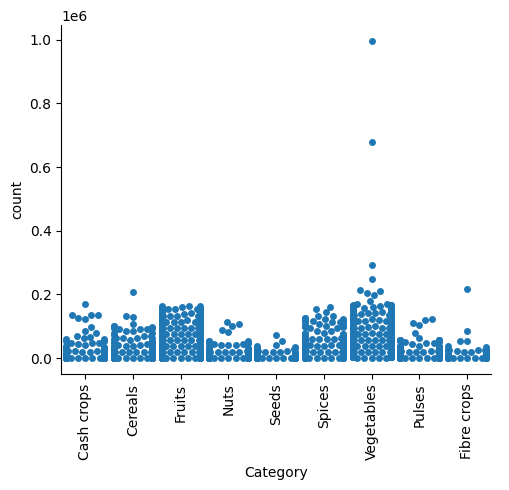

In [67]:
sns.catplot(
    data = yield_items,
    x = 'Category',
    y = 'count',
    kind = 'swarm'
)
plt.xticks(rotation=90)
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

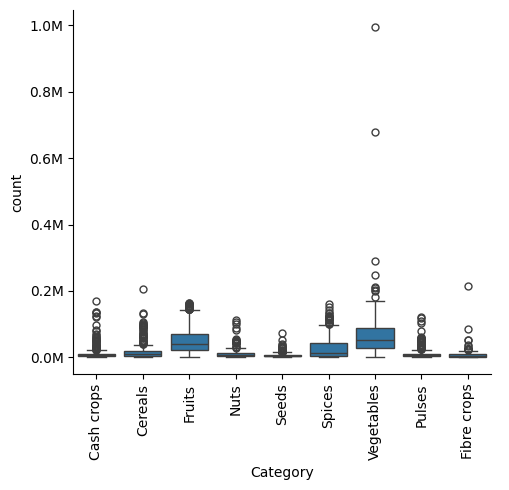

In [68]:
sns.catplot(
    data = yield_items,
    x = 'Category',
    y = 'count',
    kind = 'box'
)
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.tight_layout()
plt.show()

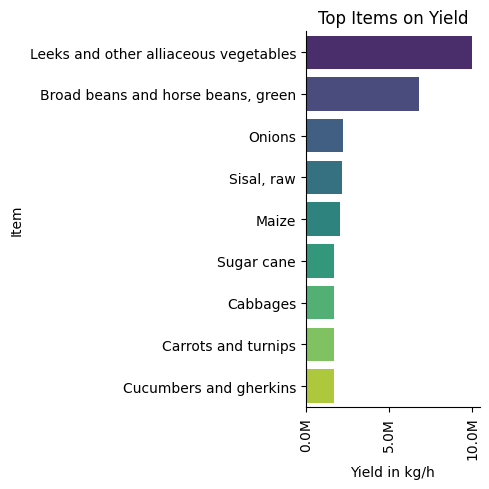

In [69]:
efficient_items = yield_items.nlargest(15,'count')
plt.Figure(figsize=(28,8))
sns.catplot(
    data = efficient_items,
    x = 'count',
    y = 'Item',
    kind = 'bar',
    errorbar = None,
    palette='viridis'
)
plt.xticks(rotation=90)
plt.title('Top Items on Yield')
plt.xlabel('Yield in kg/h')
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e5:.1f}M'))
plt.tight_layout()
plt.show()

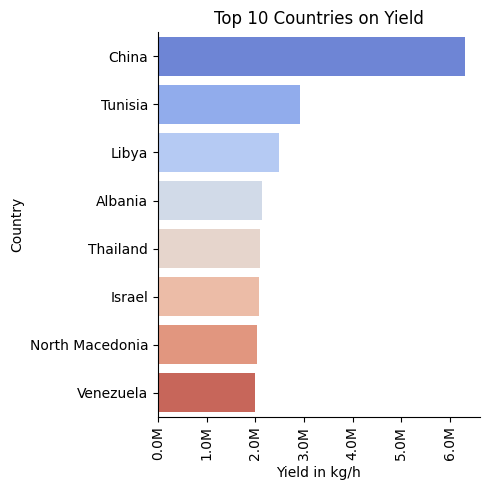

In [70]:
top_countries = yield_items.nlargest(10,'count')
sns.catplot(
    data = top_countries,
    x = 'count',
    y = 'Country',
    kind = 'bar',
    errorbar = None,
    palette = 'coolwarm'
)
plt.title('Top 10 Countries on Yield')
plt.xlabel('Yield in kg/h')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e5:.1f}M'))
plt.tight_layout()
plt.show()

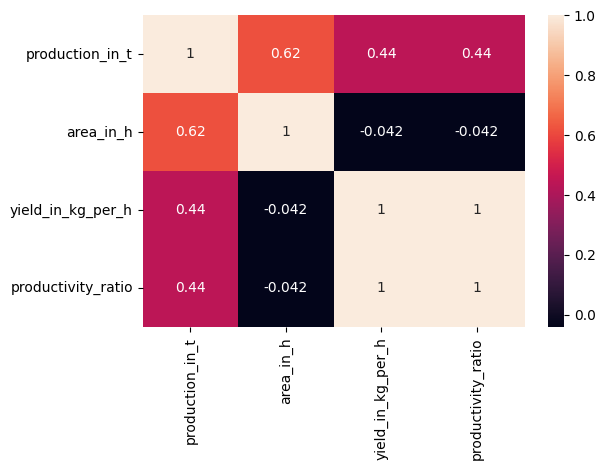

In [62]:
relation = df[['production_in_t','area_in_h','yield_in_kg_per_h','productivity_ratio']].corr()
sns.heatmap(relation, annot=True)
plt.tight_layout()
plt.show()